In [27]:
import pandas as pd
import folium

In [67]:
df = pd.read_csv("geocode.csv")

In [68]:
df.head()

,address,Latitude,Longitude,Accuracy Score,Accuracy Type,Number,Street,Unit Type,Unit Number,City,State,County,Zip,Country,Source
0,"1700 W Exchange St,Akron,OH",41.108003,-81.567957,1.0,rooftop,1700.0,W Exchange St,NaN,NaN,Akron,OH,Summit County,44313.0,US,Summit
1,"2235 Lake Avenue,Altadena,CA",34.184237,-118.131806,0.9,rooftop,2235.0,N Lake Ave,NaN,NaN,Altadena,CA,Los Angeles County,91001.0,US,Los Angeles County
2,"6800 US-67,Alvarado,TX",32.415481,-97.231891,1.0,rooftop,6800.0,E US Highway 67,NaN,NaN,Alvarado,TX,Johnson County,76009.0,US,Johnson
3,"8290 E. Crystal Drive,Anaheim,CA",33.873382,-117.747838,1.0,rooftop,8290.0,E Crystal Dr,NaN,NaN,Anaheim,CA,Orange County,92807.0,US,City of Anaheim
4,"6563 Deschutes Road,Anderson,CA",40.477423,-122.240067,1.0,rooftop,6563.0,Deschutes Rd,NaN,NaN,Anderson,CA,Shasta County,96007.0,US,Shasta County


In [69]:
data = pd.read_excel('mapdata.xlsx')

In [70]:
data.columns

Index(['Activity', 'Educator', 'Email', 'Address', 'City', 'State', 'Zip Code',
       'Address2'],
      dtype='object')

In [74]:
len(data['Educator'].unique())

381

In [77]:
len(df['State'].unique())

34

In [35]:
# Make an empty map
m = folium.Map(location=[34, -117], tiles="OpenStreetMap", zoom_start=4)
 
# I can add marker one by one on the map
for i in range(0,len(df)):
    folium.Marker([df.iloc[i]['Latitude'], df.iloc[i]['Longitude']], popup=df.iloc[i]['City']).add_to(m)

m

In [53]:
state_table = df['State'].value_counts(ascending=True)

In [78]:
state_table.to_frame().to_csv('states_preceptors.csv')

In [66]:
state_table.sum()

274

In [55]:
import matplotlib.pyplot as plt

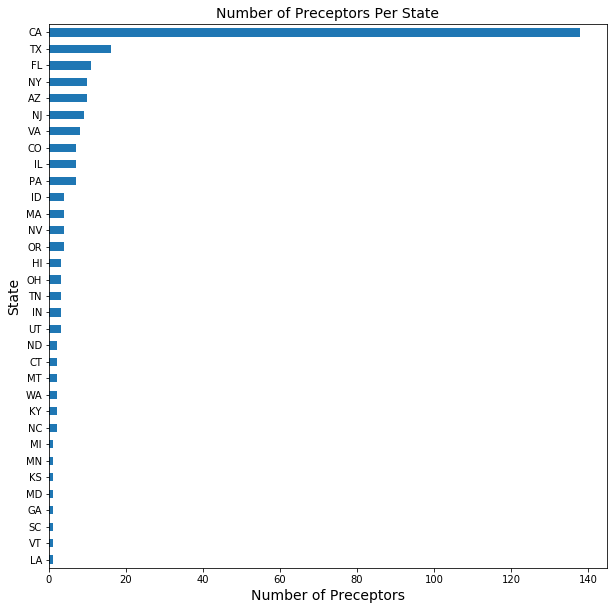

In [64]:
fig = plt.figure(figsize=(10, 10))
ax1 = fig.add_subplot(1, 1, 1)
ax1.set_title('Number of Preceptors Per State', fontsize=14)
ax1.set_xlabel('Number of Preceptors', fontsize=14) # Add the x-axis label
ax1.set_ylabel('State', fontsize=14) # Add the y-axis label
state_table.plot.barh(x='State', y='State', ax=ax1)
plt.savefig("preceptor_numbers.png", bbox_inches='tight')
plt.show()